In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
# Importing the dataset
train=pd.read_csv('./share/train.csv')
test = pd.read_csv('./share/test.csv')


In [3]:
print(train.shape)
print(test.shape)

(50000, 41)
(5083, 40)


In [4]:
train.dtypes

new_ids                    int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [5]:
train.isna().sum()

new_ids                      0
amount_tsh                   0
date_recorded                0
funder                    2924
gps_height                   0
installer                 2942
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 337
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2880
recorded_by                  0
scheme_management         3312
scheme_name              23759
permit                    2521
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
# numerical columns 
df_int = train.select_dtypes(include = 'number').copy()
#df_int.head(2)
df_int.isnull().sum()

new_ids              0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [7]:
# target column
y_train=train[['defective']]


In [8]:
# combining train and test dataframe 
df1=train.copy()
df1['indicator'] = df1.apply(lambda row:'train', axis=1)
df1=df1.drop(['defective'], axis=1)

df2=test.copy()
df2['indicator'] = df2.apply(lambda row:'test', axis=1)
df2.head()
df12=pd.concat([df1,df2])
df12.head()

,new_ids,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indicator
0,22379,5000.0,2013-02-05,Government Of Tanzania,1517,DWE,29.833534,-4.385917,Lugaragara,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train
1,37562,200.0,2013-01-17,Msf/tacare,1080,MSF/TACARE,29.681301,-4.705539,Mnyonge,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,train
2,34163,0.0,2013-01-03,Government Of Tanzania,1200,RWE,36.904968,-3.369797,Unambwe,0,...,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,train
3,4184,0.0,2013-02-02,Rwssp,0,DWE,32.540112,-3.750279,Tumaini,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train
4,57386,0.0,2013-03-04,Government Of Tanzania,1470,RWE,37.300442,-3.218826,Kwa Kirombo Msele,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other,train


# categorical values statistics 

In [9]:
# separating categorical columns 
df_cat = df12.select_dtypes(include = 'object').copy()
df_cat.head(2)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indicator
0,2013-02-05,Government Of Tanzania,DWE,Lugaragara,Lake Tanganyika,Nyamisare,Kigoma,Kasulu,Muhinda,True,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train
1,2013-01-17,Msf/tacare,MSF/TACARE,Mnyonge,Lake Tanganyika,Hwazi,Kigoma,Kigoma Rural,Mwamgongo,True,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,train


In [10]:
# categorical columns 
df_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

tmp.head()

for c in df_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [df_cat[c].unique()]
    tmp['values_count_incna'] = len(list(df_cat[c].unique()))  # distinct values
    tmp['values_count_nona'] = int(df_cat[c].nunique()) # distinct values without nan
    tmp['num_miss'] = df_cat[c].isnull().sum()   # number of missing 
    tmp['pct_miss'] = (df_cat[c].isnull().sum()/ len(df_cat)).round(3)*100  # percent of missing 
    df_cat_stats = df_cat_stats.append(tmp)
    
#df_cat_stats

# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
df_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
df_cat_stats.set_index('column', inplace = True)
df_cat_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
recorded_by,[GeoData Consultants Ltd],1,1,0,0.0
indicator,"[train, test]",2,2,0,0.0
permit,"[False, True, nan]",3,2,2756,5.0
public_meeting,"[True, False, nan]",3,2,3178,5.8
source_class,"[groundwater, surface, unknown]",3,3,0,0.0
quantity_group,"[enough, seasonal, insufficient, unknown, dry]",5,5,0,0.0
quantity,"[enough, seasonal, insufficient, unknown, dry]",5,5,0,0.0
management_group,"[user-group, commercial, other, unknown, paras...",5,5,0,0.0
quality_group,"[good, milky, salty, unknown, colored, fluoride]",6,6,0,0.0


# Feature engineering 

In [11]:
# handeling missing values by imputations 

In [12]:
df12_pro=df12.copy()

df12_pro.permit.unique()
df12_pro['permit'] = df12_pro['permit'].fillna('other')
df12_pro['public_meeting'] = df12_pro['public_meeting'].fillna('other')
df12_pro['scheme_management'] = df12_pro['scheme_management'].fillna('other')
df12_pro['funder'] = df12_pro['funder'].fillna('other')
df12_pro['installer'] = df12_pro['installer'].fillna('other')
df12_pro['scheme_name'] = df12_pro['scheme_name'].fillna('other')
df12_pro['subvillage'] = df12_pro['subvillage'].fillna('other')



#df12_pro.isnull().sum()

In [13]:
df12_pro.waterpoint_type_group.value_counts()

communal standpipe    31717
hand pump             16459
other                  6087
improved spring         699
cattle trough           114
dam                       7
Name: waterpoint_type_group, dtype: int64

In [14]:
df12_pro['waterpoint_type'].value_counts()

communal standpipe             26262
hand pump                      16459
other                           6087
communal standpipe multiple     5455
improved spring                  699
cattle trough                    114
dam                                7
Name: waterpoint_type, dtype: int64

In [15]:
df12_pro['payment'].value_counts()

never pay                23441
pay per bucket            8576
unknown                   7725
pay monthly               7373
pay when scheme fails     3637
pay annually              3395
other                      936
Name: payment, dtype: int64

In [16]:
df12_pro['payment_type'].value_counts()

never pay     23441
per bucket     8576
unknown        7725
monthly        7373
on failure     3637
annually       3395
other           936
Name: payment_type, dtype: int64

In [17]:
df12_pro['source'].value_counts()

shallow well            15867
spring                  15745
machine dbh             10584
river                    8391
rainwater harvesting     1981
hand dtw                  857
lake                      753
dam                       632
other                     211
unknown                    62
Name: source, dtype: int64

In [18]:
df12_pro['source_type'].value_counts()

shallow well            15867
spring                  15745
borehole                11441
river/lake               9144
rainwater harvesting     1981
dam                       632
other                     273
Name: source_type, dtype: int64

In [19]:
df12_pro['management'].value_counts()

vwc                 37716
wug                  5870
water board          2668
wua                  2330
private operator     1927
parastatal           1557
water authority       852
other                 789
company               670
unknown               534
other - school         98
trust                  72
Name: management, dtype: int64

In [20]:
df12_pro['scheme_management'].value_counts()

VWC                 34459
WUG                  4534
other                3654
Water authority      2705
WUA                  2644
Water Board          2637
Parastatal           1478
Private operator     1040
Company              1024
Other                 744
SWC                    96
Trust                  67
None                    1
Name: scheme_management, dtype: int64

In [21]:
df12_pro['extraction_type'].value_counts()

gravity                      24079
nira/tanira                   7513
other                         6224
submersible                   4537
swn 80                        3458
mono                          2736
india mark ii                 2321
afridev                       1728
ksb                           1389
other - rope pump              434
other - swn 81                 222
windmill                       110
india mark iii                  97
other - play pump               84
cemo                            81
walimi                          36
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [22]:
df12_pro['extraction_type_group'].value_counts()

gravity            24079
nira/tanira         7513
other               6224
submersible         5926
swn 80              3458
mono                2736
india mark ii       2321
afridev             1728
rope pump            434
other handpump       344
other motorpump      113
wind-powered         110
india mark iii        97
Name: extraction_type_group, dtype: int64

In [23]:
pd.pivot_table(df12_pro,index='management',columns='management',aggfunc=np.sum)


amount_tsh                                     \
management          company    other other - school parastatal   
management                                                       
company            201710.0      NaN            NaN        NaN   
other                   NaN  34240.0            NaN        NaN   
other - school          NaN      NaN        18530.0        NaN   
parastatal              NaN      NaN            NaN  1346204.0   
private operator        NaN      NaN            NaN        NaN   
trust                   NaN      NaN            NaN        NaN   
unknown                 NaN      NaN            NaN        NaN   
vwc                     NaN      NaN            NaN        NaN   
water authority         NaN      NaN            NaN        NaN   
water board             NaN      NaN            NaN        NaN   
wua                     NaN      NaN            NaN        NaN   
wug                     NaN      NaN            NaN        NaN   

                                                                \
management       private operator   trust  unknown         vwc   
management                                                       
company                       NaN     NaN      NaN         NaN   
other                         NaN     NaN      NaN         NaN   
other - school                NaN     NaN      NaN         NaN   
parastatal                    NaN     NaN      NaN         NaN   
private operator         720335.0     NaN      NaN         NaN   
trust                         NaN  5740.0      NaN         NaN   
unknown                       NaN     NaN  32770.0         NaN   
vwc                           NaN     NaN      NaN  11742807.6   
water authority               NaN     NaN      NaN         NaN   
water board                   NaN     NaN      NaN         NaN   
wua                           NaN     NaN      NaN         NaN   
wug                           NaN     NaN      NaN         NaN   

                                               ...       region_code  \
management       water authority water board   ...    other - school   
management                                     ...                     
company                      NaN         NaN   ...               NaN   
other                        NaN         NaN   ...               NaN   
other - school               NaN         NaN   ...             686.0   
parastatal                   NaN         NaN   ...               NaN   
private operator             NaN         NaN   ...               NaN   
trust                        NaN         NaN   ...               NaN   
unknown                      NaN         NaN   ...               NaN   
vwc                          NaN         NaN   ...               NaN   
water authority         127891.0         NaN   ...               NaN   
water board                  NaN   559945.25   ...               NaN   
wua                          NaN         NaN   ...               NaN   
wug                          NaN         NaN   ...               NaN   

                                                                         \
management       parastatal private operator   trust  unknown       vwc   
management                                                                
company                 NaN              NaN     NaN      NaN       NaN   
other                   NaN              NaN     NaN      NaN       NaN   
other - school          NaN              NaN     NaN      NaN       NaN   
parastatal          23007.0              NaN     NaN      NaN       NaN   
private operator        NaN          28510.0     NaN      NaN       NaN   
trust                   NaN              NaN  2036.0      NaN       NaN   
unknown                 NaN              NaN     NaN  10506.0       NaN   
vwc                     NaN              NaN     NaN      NaN  615875.0   
water authority         NaN              NaN     NaN      NaN       NaN   
water board             NaN              NaN     NaN  

In [25]:
#pivote , index, horizontal (both coluns )
#join distribution

In [26]:
# find age of the pump in year
'''
def extract_day(raw):
    diff=(pd.to_datetime('2019-1-28', format='%Y/%m/%d')-raw['date_recorded']).days
    return diff

df12_pro['date_recorded']=pd.to_datetime(df12_pro['date_recorded'], format='%Y/%m/%d')
df12_pro['pump_age_days']=df12_pro.apply(extract_day, axis=1)

'''

"\ndef extract_day(raw):\n    diff=(pd.to_datetime('2019-1-28', format='%Y/%m/%d')-raw['date_recorded']).days\n    return diff\n\ndf12_pro['date_recorded']=pd.to_datetime(df12_pro['date_recorded'], format='%Y/%m/%d')\ndf12_pro['pump_age_days']=df12_pro.apply(extract_day, axis=1)\n\n"

In [27]:
# find age of the pump in year

def extract_num_year(raw):
    diff=2019-raw['construction_year']
    return diff

df12_pro['pump_age_year']=df12_pro.apply(extract_num_year, axis=1)
df12_pro=df12_pro.drop('construction_year',axis=1)


In [28]:
df12_pro.columns

Index(['new_ids', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'indicator',
       'pump_age_year'],
      dtype='object')

In [29]:
## remove some columns which repeats the ctegory , name columns , datetime columns etc


In [30]:
#df12_pro.isnull().sum()

In [47]:
# name of the columns

# remove- new_id,date_recorded, logitude, latitude, 
column_name0=['amount_tsh', 'funder', 'gps_height',
       'installer', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group','indicator', 'pump_age_year']


## highest irrelevant category - new_id,date_recorde, wpt_name, subvillage, ward,scheme_name, installer, funder, logitude, latitude, 
column_name1=['amount_tsh', 'gps_height',
       'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga',
       'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'indicator','pump_age_year']


## highest irrelevant category - new_id,date_recorde, wpt_name, subvillage, ward,scheme_name, installer, funder, logitude, latitude,
## region_code, district_code,recorded_by,payment_type,quantity_group

column_name2=['amount_tsh', 'gps_height',
       'num_private',
       'basin', 'region', 'lga',
       'population', 'public_meeting',
       'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group','indicator', 'pump_age_year']

In [48]:
df12_pro.scheme_management.unique()

array(['Water authority', 'WUG', 'VWC', 'other', 'Private operator',
       'WUA', 'Water Board', 'Company', 'Other', 'Parastatal', 'Trust',
       'SWC', 'None'], dtype=object)

In [49]:
df12_pro1=df12_pro[column_name2]
df12_pro1.head()

,amount_tsh,gps_height,num_private,basin,region,lga,population,public_meeting,scheme_management,permit,...,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indicator,pump_age_year
0,5000.0,1517,0,Lake Tanganyika,Kigoma,Kasulu,1200,True,Water authority,False,...,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train,18
1,200.0,1080,0,Lake Tanganyika,Kigoma,Kigoma Rural,123,True,WUG,True,...,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,train,13
2,0.0,1200,0,Pangani,Arusha,Meru,120,True,VWC,True,...,soft,good,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,train,55
3,0.0,0,0,Lake Victoria,Shinyanga,Kahama,0,True,other,True,...,milky,milky,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train,2019
4,0.0,1470,0,Pangani,Kilimanjaro,Moshi Rural,1,False,VWC,True,...,soft,good,insufficient,spring,spring,groundwater,other,other,train,43


In [50]:
#select train and test data from main data frame and drop indicator column 
df12_pro1_train=df12_pro1.loc[df12_pro1['indicator'] == 'train']
df12_pro1_train=df12_pro1_train.drop(['indicator'], axis=1)


df12_pro1_test=df12_pro1.loc[df12_pro1['indicator'] == 'test']
df12_pro1_test=df12_pro1_test.drop(['indicator'], axis=1)



In [51]:
len(df12_pro1_train.columns)

25

In [52]:
df12_pro1_train.shape
#df12_pro1_test.shape


#df12_pro_test.shape

(50000, 25)

In [53]:
df12_pro1_train.columns

Index(['amount_tsh', 'gps_height', 'num_private', 'basin', 'region', 'lga',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'pump_age_year'],
      dtype='object')

In [54]:
## one hotencoding of categorical variables
df12_pro1_train_onehot = df12_pro1_train.copy()
df12_pro1_train_onehot = pd.get_dummies(df12_pro1_train_onehot)
df12_pro1_train_onehot.head()


,amount_tsh,gps_height,num_private,population,pump_age_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,5000.0,1517,0,1200,18,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,200.0,1080,0,123,13,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,1200,0,120,55,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0,0,0,2019,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.0,1470,0,1,43,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [55]:
""""
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# onehot coding using sklearn
df12_pro1_train_onehot_sklearn = df12_pro1_train.copy()
ohe=OneHotEncoder()
ohe_results = ohe.fit_transform(df12_pro1_train_onehot_sklearn)
ohe_results_df = pd.DataFrame(ohe_results, columns=ohe.classes_)
ohe_results_df.head()

# binary encoder
df12_pro1_train_ce = df12_pro1_train.copy()
encoder = ce.BinaryEncoder()
df_binary = encoder.fit_transform(df12_pro1_train_ce)
df_binary.head()

"""

'"\nimport category_encoders as ce\nfrom sklearn.preprocessing import LabelBinarizer\nfrom sklearn.preprocessing import OneHotEncoder\n\n# onehot coding using sklearn\ndf12_pro1_train_onehot_sklearn = df12_pro1_train.copy()\nohe=OneHotEncoder()\nohe_results = ohe.fit_transform(df12_pro1_train_onehot_sklearn)\nohe_results_df = pd.DataFrame(ohe_results, columns=ohe.classes_)\nohe_results_df.head()\n\n# binary encoder\ndf12_pro1_train_ce = df12_pro1_train.copy()\nencoder = ce.BinaryEncoder()\ndf_binary = encoder.fit_transform(df12_pro1_train_ce)\ndf_binary.head()\n\n'

In [56]:
# join back target column
y_train=train[['defective']]
#df12_pro1_train_onehot = pd.concat([df12_pro1_train_onehot, y_train], axis=1)

In [57]:
X=df12_pro1_train_onehot.values
y=y_train.values


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,label_binarize,LabelBinarizer
from sklearn.svm import LinearSVC, SVC,libsvm_sparse
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import NMF, LatentDirichletAllocation



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [66]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0,class_weight='balanced')
classifier = LogisticRegression(random_state = 0,)



## model creation
#classifier = GaussianNB() #  Naive Bayes
#classifier = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced',multi_class='multinomial')
#classifier = LogisticRegression(random_state=0,class_weight='balanced')
#classifier=LinearSVC(class_weight='balanced')
#classifier= RandomForestClassifier()

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)



/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          no       0.79      0.90      0.84      5892
         yes       0.82      0.66      0.73      4108

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.81      0.78      0.79     10000
weighted avg       0.80      0.80      0.80     10000



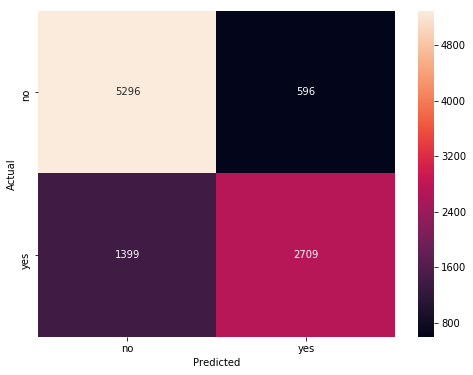

In [62]:
# matrix to measure classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix

class_names=train['defective'].unique()

# print classification scores 
print(metrics.classification_report(y_test, y_pred,target_names=class_names))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# error = 0.9 FNR + 0.1 FPR


## logistic with columns2
          precision    recall  f1-score   support

          no       0.82      0.83      0.82      5892
         yes       0.75      0.74      0.74      4108

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.79      0.79      0.79     10000




    
# RF with columns2    
        precision    recall  f1-score   support

          no       0.85      0.89      0.87      5892
         yes       0.83      0.77      0.80      4108

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000




# RF with columns1
    precision    recall  f1-score   support

          no       0.85      0.88      0.86      5892
         yes       0.82      0.77      0.79      4108

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000

# Deep Learning base model

In [63]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



Using TensorFlow backend.


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Encode for string labels
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder().fit(y)
y_num = label_encoder.transform(y)
## no-0 , yes-1

X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [87]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [123]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 293))
#classifier.add(Dropout(p = 0.1))
# Adding the second hidden layer
classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(p = 0.1))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [124]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 50)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
# As DL give the probability 
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/50
40000/40000 [==============================] - 1s 27us/step - loss: 0.5651 - acc: 0.7048
Epoch 2/50
40000/40000 [==============================] - 0s 8us/step - loss: 0.4261 - acc: 0.8064
Epoch 3/50
40000/40000 [==============================] - 0s 8us/step - loss: 0.3895 - acc: 0.8252
Epoch 4/50
40000/40000 [==============================] - 0s 7us/step - loss: 0.3749 - acc: 0.8300
Epoch 5/50
40000/40000 [==============================] - 0s 6us/step - loss: 0.3648 - acc: 0.8356
Epoch 6/50
40000/40000 [==============================] - 0s 8us/step - loss: 0.3562 - acc: 0.8414
Epoch 7/50
40000/40000 [==============================] - 0s 6us/step - loss: 0.3511 - acc: 0.8421
Epoch 8/50
40000/40000 [==============================] - 0s 7us/step - loss: 0.3453 - acc: 0.8449
Epoch 9/50
40000/40000 [==============================] - 0s 6us/step - loss: 0.3406 - acc: 0.8478
Epoch 10/50
40000/40000 [==============================] - 0s 8us/step - loss: 0.3356 - acc: 0.8498
Epoch 11

              precision    recall  f1-score   support

          no       0.83      0.88      0.86      5892
         yes       0.81      0.75      0.78      4108

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.82      0.81      0.82     10000
weighted avg       0.82      0.83      0.82     10000



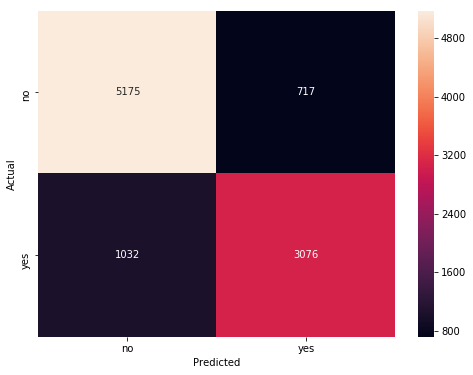

In [126]:
class_names=train['defective'].unique()

# print classification scores 
print(metrics.classification_report(y_test, y_pred,target_names=class_names))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [127]:
cm

array([[5175,  717],
       [1032, 3076]])

# Frequency distribution

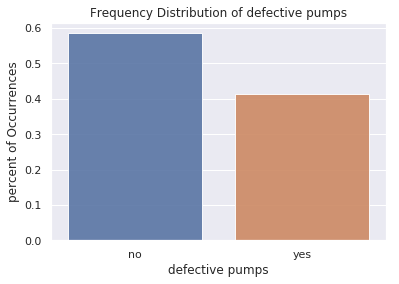

In [21]:

defective_count = train['defective'].value_counts(0.1)
sns.set(style="darkgrid")
sns.barplot(defective_count.index, defective_count.values, alpha=0.9)
plt.title('Frequency Distribution of defective pumps')
plt.ylabel('percent of Occurrences', fontsize=12)
plt.xlabel('defective pumps', fontsize=12)
plt.show()

In [ ]:

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()